In [1]:
# Import the relevant modules
import os
import sys
import glob

# Import third party modules
import numpy as np
import xarray as xr
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import dictionaries_em as dicts

In [3]:
sys.path.append("/home/users/benhutch/energy-met-corr-functions")

# Import the functions
import functions_em as funcs

In [4]:
import importlib

importlib.reload(funcs)

<module 'functions_em' from '/home/users/benhutch/energy-met-corr-functions/functions_em.py'>

### Aggregate onshore wind correlations ###

### Solar correlations ###

Looking at correlations between climate indices (solar irradiance, NAO, delta P) and countrywide solar power generation from the CLEARHEADS data.

The data we want is in:

* *NUTS_0_sp_historical.nc* - Hourly area-averaged solar power capacity factors at NUTS0 level across Europe from 1950 to 2020.
* *NUTS_0_sp_historical_loc_weighted.nc* - Hourly solar power capacity factors at NUTS0 level across Europe, from 01/01/1950 - 31/12/2020. Data is weighted by the location of known solar panels from Dunnett et al., (2020) and Stowell et al., (2020) for the UK.
    * This dataset appears to be buggy, use the former.

In [5]:
# Ste up the model config
# Set up the model config
# model_config = {
#     "variable": "rsds",
#     "season": "ONDJFM",
#     "region": "global",
#     "start_year": 1964,
#     "end_year": 2014,
#     "forecast_range": "2-9",
#     "lag": 4,
#     "method": "alternate_lag",
# }

# rsds_global_ONDJFM_2-9_1961_2014_4_West Mediterranean_nao_matched.csv
# model_config = {
#     "variable": "psl",
#     "season": "ONDJFM",
#     "region": "global",
#     "nao": "nao_default",
#     "start_year": 1961,
#     "end_year": 2014,
#     "forecast_range": "2-9",
#     "lag": 4,
#     "method": "alternate_lag",
# }

# file="NUTS_0_t2m_detrended_timeseries_historical_pop_weighted.nc",
# shp_file="NUTS_RG_10M_2021_4326.shp",
# shp_file_dir="/home/users/benhutch/shapefiles/NUTS/",
# label="Pop. weighted temp (K)",
# trend_level=2020.0,
# tas_global_ONDJFM_2-9_1961_2014_4_UK_grid_nao_matched.csv

# model config for 10m wind speeds
model_config = {
    "variable": "tas",
    "season": "ONDJFM",
    "region": "global",
    "start_year": 1961,
    "end_year": 2014,
    "forecast_range": "2-9",
    "lag": 4,
    "gridbox": "UK_grid",
    "method": "nao_matched",
}

# ~/shapefiles/NUTS/NUTS_RG_10M_2021_4326.shp

# NUTS_0_wp_ons_sim_1_historical_loc_weighted.n
# weighted by location of known and proposed future wind farms

# Call the function
# TODO: onshore wind correlations
dfs = funcs.correlate_nao_uread(
    filename="NUTS_0_t2m_detrended_timeseries_historical.nc",
    obs_var="t2m",
    use_model_data=True,
    model_config=model_config,
    trend_level=0.0,
)

# use_model_data=True,
# model_config=model_config,

NUTS_keys for UREAD data:  ['AT' 'AL' 'BY' 'BE' 'BA' 'BG' 'HR' 'CZ' 'DK' 'EE' 'FI' 'FR' 'DE' 'GR'
 'HU' 'IE' 'IT' 'XK' 'LV' 'LT' 'LU' 'MK' 'MD' 'ME' 'NL' 'NO' 'PL' 'PT'
 'RO' 'RS' 'SK' 'SI' 'ES' 'SE' 'CH' 'TR' 'UA' 'UK']
Trend levels for UREAD data:  [1950. 1980. 2010. 2020.    0.]
The observed variable is not mean sea level pressure.
calculating correlation skill for gridpoint variable
Extracting the stored gridbox averaged variable data for the specified box
Model filename:  tas_global_ONDJFM_2-9_1961_2014_4_UK_grid_nao_matched.csv


In [6]:
len(dfs)

4

In [7]:
# merged_df, corr_df = dfs

In [8]:
df, df_model, merged_df, corr_df = dfs

In [9]:
merged_df.head()

,AT,AL,BY,BE,BA,BG,HR,CZ,DK,EE,...,SE,CH,TR,UA,UK,init_years,obs_ts,fcst_ts_mean,fcst_ts_min,fcst_ts_max
1969,0.127604,6.464607,-2.141177,4.504322,3.533698,4.313818,6.088005,1.531530,3.203934,-2.448484,...,-4.399271,-1.200651,5.979239,0.446115,5.490096,1964,-0.337828,-0.390671,-0.768790,0.093522
1970,0.228338,6.506435,-2.001061,4.532892,3.622953,4.142153,6.162156,1.712560,3.479509,-2.067433,...,-3.891593,-1.160423,5.758761,0.330897,5.619512,1965,-0.264333,-0.475027,-0.828426,-0.061780
1971,0.198210,6.475114,-1.550181,4.527906,3.616981,4.162197,6.161330,1.712984,3.601192,-1.638219,...,-3.703523,-1.180848,5.742166,0.647890,5.652236,1966,-0.252701,-0.506569,-0.872540,-0.061780
1972,0.121435,6.411184,-1.660853,4.471432,3.504759,3.985193,6.045462,1.602304,3.599952,-1.646051,...,-3.593347,-1.245894,5.594198,0.404721,5.718394,1967,-0.195579,-0.525039,-0.866348,-0.304132
1973,0.368428,6.528544,-1.315690,4.628332,3.812796,4.308998,6.321897,1.915464,3.747891,-1.464112,...,-3.472647,-1.128430,5.636438,0.718244,5.732118,1968,-0.185448,-0.536798,-0.866348,-0.370021


In [10]:
# restrict merged_df to the index, fcst_ts_mean and obs_ts and UK
merged_df_subset = merged_df[[
    "fcst_ts_mean",
    "obs_ts",
    "UK",
]]

In [11]:
merged_df_subset.head()

,fcst_ts_mean,obs_ts,UK
1969,-0.390671,-0.337828,5.490096
1970,-0.475027,-0.264333,5.619512
1971,-0.506569,-0.252701,5.652236
1972,-0.525039,-0.195579,5.718394
1973,-0.536798,-0.185448,5.732118


In [12]:
# path to file
path = "/home/users/benhutch/NGrid_demand/csv_files/ERA5_climate_indices_demand_Thornton_Bloomfield_8yrRM_ONDJFM.csv"

# open the file
demand_df = pd.read_csv(path)

In [13]:
demand_df.head()

,date,NAO anomaly (Pa),delta P anomaly (Pa),UK_temp_anomaly,elec_demand_5yrRmean,elec_demand_5yrRmean_nohols,gas_demand_5yrRmean,gas_demand_5yrRmean_nohols,gas_demand_raw,UK_demand (GW),UK_wd_demand (GW)
0,1964-12-31,-459.574041,-266.863413,4.910844,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1965-12-31,-690.520941,-402.505753,4.787535,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1966-12-31,-668.601591,-396.281847,4.835569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1967-12-31,-603.603464,-311.324045,5.176834,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1968-12-31,-487.695747,-261.748211,5.318128,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Convert the 'date' column to datetime format
demand_df['date'] = pd.to_datetime(demand_df['date'])

# Extract the year and set it as the index
demand_df['year'] = demand_df['date'].dt.year
demand_df.set_index('year', inplace=True)

In [15]:
demand_df = demand_df.drop('date', axis=1)

In [16]:
demand_df = demand_df.dropna()

In [17]:
# join the dataframes
merged_df = merged_df_subset.join(demand_df, how='left')

In [18]:
merged_df.head()

,fcst_ts_mean,obs_ts,UK,NAO anomaly (Pa),delta P anomaly (Pa),UK_temp_anomaly,elec_demand_5yrRmean,elec_demand_5yrRmean_nohols,gas_demand_5yrRmean,gas_demand_5yrRmean_nohols,gas_demand_raw,UK_demand (GW),UK_wd_demand (GW)
1969,-0.390671,-0.337828,5.490096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970,-0.475027,-0.264333,5.619512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971,-0.506569,-0.252701,5.652236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972,-0.525039,-0.195579,5.718394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973,-0.536798,-0.185448,5.732118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# restrict to NAO anomaly (Pa) column
merged_df = merged_df["UK"]

In [ ]:
merged_df.head()

In [ ]:
# Convert the Series to a DataFrame
merged_df = merged_df.to_frame()

# Reset the index
merged_df.reset_index(inplace=True)

In [ ]:
# save the file
# # output directory
output_dir = "/home/users/benhutch/NGrid_demand/csv_files"

# output filename
output_fname = "obs_UK_historical_temp_detrend_0.csv"

# Save as a csv file
# save the dataframe to a .csv file
merged_df.to_csv(os.path.join(output_dir, output_fname), index=False)

In [ ]:
# df, merged_df, merged_df_full, corr_df = dfs

In [ ]:
# merged_df_hdd = merged_df_full

In [ ]:
# merged_df_hdd.head()

In [ ]:
# dfs_ofs_wind = funcs.correlate_nao_uread(
#     filename="EEZ_zones_wp_historical.nc",
#     nao_n_grid=dicts.uk_n_box_corrected,
#     nao_s_grid=dicts.uk_s_box_corrected,
#     use_model_data=True,
#     model_config=model_config,
# )

In [ ]:
# len(dfs_ofs_wind)

In [ ]:
# _, _, merged_df_full, _ = dfs_ofs_wind

In [ ]:
# # Combine these two datasets together
# # HDD - offshore wind
# # add suffixes
# merged_df_hdd = merged_df_hdd.add_suffix("_HDD")
# merged_df_wind = merged_df_full.add_suffix("_ofs_wind")

In [ ]:
# # join the two dataframes
# hdd_wind = merged_df_hdd.join(merged_df_wind)

In [ ]:
# hdd_wind.columns

In [ ]:
# # Create a new dataframe
# demand_net_wind = pd.DataFrame()

# # Loop over the columns
# for column in hdd_wind.columns:
#     if column.endswith('_HDD'):
#         country_code = column[:2]  # Get the country code
#         if f"{country_code}_ofs_wind" in hdd_wind.columns:
#             # Standardize the columns before taking the difference
#             hdd_standardized = (hdd_wind[column] - hdd_wind[column].mean()) / hdd_wind[column].std()
#             ofs_wind_standardized = (hdd_wind[f"{country_code}_ofs_wind"] - hdd_wind[f"{country_code}_ofs_wind"].mean()) / hdd_wind[f"{country_code}_ofs_wind"].std()
            
#             demand_net_wind[f'{country_code}_diff'] = hdd_standardized - ofs_wind_standardized

In [ ]:
# demand_net_wind.head()

In [ ]:
# demand_net_wind["model_NAO_anomaly_(hPa)"] = hdd_wind['model_nao_mean_ofs_wind']

In [ ]:
# from scipy.stats import pearsonr

# # Create an empty list to store the data
# data = []

# # Loop over the columns
# for column in demand_net_wind.columns:
#     if column.endswith('_diff'):
#         # Extract the country code
#         country_code = column[:2]

#         if not demand_net_wind[column].isna().any():
#             # Calculate the correlation and p-value
#             corr, p_value = pearsonr(demand_net_wind[column], demand_net_wind['model_NAO_anomaly_(hPa)'])
        
#             # Append the results to the data list
#             data.append([country_code, corr, p_value])
#         else:
#             data.append([country_code, np.nan, np.nan])

# # Convert the data list to a dataframe
# diff_cor_df = pd.DataFrame(data, columns=['Country Code', 'Correlation', 'P-Value'])

In [ ]:
# hdd_wind.head()

In [ ]:
# diff_cor_df

In [ ]:
# # Rename the columns
# corr_df = corr_df.rename(columns={
#     "correlation": "correlation_(hc_nao, onshore_cfs)",
#     "p-value": "p-value_(hc_nao, onshore_cfs)"
# })

In [ ]:
# demand_net_wind.head()

In [ ]:
# Process the data but using delta P instead of the NAO index

In [ ]:
# nao_df_dir = "/gws/nopw/j04/canari/users/benhutch/nao_stats_df/"
# nao_df_fname = "psl_ONDJFM_global_1961_2014_2-9_4_nao_default.csv"

# # # Set up the model config
# # model_config = {
# #     "variable": "psl",
# #     "season": "ONDJFM",
# #     "region": "global",
# #     "start_year": 1961,
# #     "end_year": 2014,
# #     "forecast_range": "2-9",
# #     "lag": 4,
# #     "nao": "thornton_2019_uk",
# # }

# # Set up the model config
# model_config = {
#     "variable": "psl",
#     "season": "ONDJFM",
#     "region": "global",
#     "start_year": 1961,
#     "end_year": 2014,
#     "forecast_range": "2-9",
#     "lag": 4,
#     "nao": "thornton_2019_uk",
#     "gridbox": "Scandinavia",
#     "method": "nao_matched",
# }


# # EEZ_zones_wp_historical.nc
# # NUTS_0_HDD_historical_pop_weighted.nc
# # test the other function for doing this
# # days for cooling degree days
# df, merged_df, merged_df_full, corr_df = funcs.correlate_nao_uread(
#     filename="NUTS_0_HDD_historical_pop_weighted.nc",
#     time_unit="d",
#     obs_var="msl",
#     avg_grid=dicts.scandi_box,
#     use_model_data=True,
#     model_config=model_config,
# )

In [ ]:
# calib_df = funcs.calc_model_nao_gridbox_var_corr(
#     nao_df=merged_df_full,
#     gridbox=dicts.med_box_focus,
#     obs_var="ssrd",
#     obs_var_data_path=dicts.regrid_file,
#     coeff_fname="obs_nao_obs_solar_cfs_slope.csv",
# )

In [ ]:
# calib_df.head()

In [ ]:
# # reload the functions
# import importlib

# importlib.reload(funcs)

In [ ]:
# # Test the plotting function
# funcs.plot_calib_corr(
#     df=calib_df,
#     predictand_var="ES",
#     index_name="Calibrated NAO (hPa)",
#     ylabel="Spain solar CF.'s (GW)",
#     zero_line=False,
# )

In [ ]:
# # Plot the calibrated_model_nao_mean against the var228 anomaly mean
# # with seperate y-axes
# from scipy.stats import pearsonr

# # Create a new figure and an axes
# fig, ax1 = plt.subplots()

# # Plot the calibrated_model_nao_mean on the first y-axis
# ax1.plot(df.index, df["calibrated_model_nao_mean"], color="blue", label="nao")
# ax1.set_ylabel("pr anomalies (mm/day)")
# # Plot the var228 anomaly mean on the second y-axis
# ax1.plot(df.index, df["var228 anomaly mean"], color="red", label="var228")

# # show the correlation coefiients
# corr, p = pearsonr(df["calibrated_model_nao_mean"], df["var228 anomaly mean"])

# # Include a textbox in the top left hand corner with the corr and p values
# plt.text(
#     0.05,
#     0.95,
#     f"Corr: {round(corr, 2)}\n p-value: {round(p, 2)}",
#     horizontalalignment="left",
#     verticalalignment="top",
#     transform=plt.gca().transAxes,
#     bbox=dict(facecolor="white", alpha=0.5),
# )

# # Include a horixzontal black dashed line at y=0
# plt.axhline(0, color="black", linestyle="--")

# # Include a legend
# plt.legend(loc="upper right")

# # Show the plot
# plt.show()

In [ ]:
# print(f"{p:.2f}")

In [ ]:
# Testing the NUTS shapefiles
# Load in the shapefile fo the eez data
NUTS_shapefile = gpd.read_file("~/shapefiles/NUTS/NUTS_RG_10M_2021_4326.shp")

# Restrict to level code 0
NUTS_shapefile = NUTS_shapefile[NUTS_shapefile.LEVL_CODE == 0]

# Extract the second element of the tuple
countries_codes = list(dicts.countries_nuts_id.values())

# Limit the gpd to the countries in the dictionary
NUTS_shapefile = NUTS_shapefile[NUTS_shapefile.NUTS_ID.isin(countries_codes)]

# Keep only the NUTS_ID, NUTS_NAME, and geometry columns
NUTS_shapefile = NUTS_shapefile[["NUTS_ID", "NUTS_NAME", "geometry"]]

In [ ]:
NUTS_shapefile.head()

In [ ]:
corr_df.head()

In [ ]:
# Load in the shapefile fo the eez data
EEZ_shapefile = gpd.read_file("~/shapefiles/EEZ/eez_v12.shp")

In [ ]:
EEZ_shapefile.head()

In [ ]:
# # Print all of the column names for the eeZ shapefile
# print(EEZ_shapefile.columns)

In [ ]:
# Throw away all of the columns, apart from "GEONAME", 'SOVEREIGN1',
# "ISOSOV1", "geometry"
EEZ_shapefile = EEZ_shapefile[["GEONAME", "SOVEREIGN1", "ISO_SOV1", "geometry"]]

In [ ]:
EEZ_shapefile.head()

In [ ]:
iso_sov1 = EEZ_shapefile["ISO_SOV1"].values

In [ ]:
iso_sov1

In [ ]:
# Extract the values of the region column from corr_df
region_values = corr_df.region.values

In [ ]:
region_values

In [ ]:
# reload the dictionary
importlib.reload(dicts)

In [ ]:
# Convert the region values to equivalent iso_sov1 values
# using the mapping in the dictionary
iso_sov1_values = [dicts.iso_mapping[region] for region in region_values]

In [ ]:
iso_sov1_values

In [ ]:
# Constrain the geo dataframe to only include the iso_sov1 values
EEZ_shapefile = EEZ_shapefile[EEZ_shapefile["ISO_SOV1"].isin(iso_sov1_values)]

In [ ]:
# Find where ISO_SOV1 is equal to "ITA"
EEZ_shapefile.head()

In [ ]:
# Where corr_df.region passed through iso_mapping dict is
# equal to the values in EEZ_shapefile.ISO_SOV1
# Add the corresponding correlation and p-value to the dataframe

In [ ]:
# Filter df to only include the rows where GEONAME includes: "Exclusive Economic Zone"
EEZ_shapefile = EEZ_shapefile[
    EEZ_shapefile["GEONAME"].str.contains("Exclusive Economic Zone")
]

In [ ]:
EEZ_shapefile.head()

In [ ]:
# Now we want to append the correlation and p-value to the dataframe
# Add a new column to corr_df called "ISO_SOV1"
corr_df["ISO_SOV1"] = iso_sov1_values

In [ ]:
corr_df["region"] == "EL"

In [ ]:
# Loop over the columns in EEZ_shapefile and add the correlation and p-value
# where the ISO_SOV1 values are equal
for index, row in EEZ_shapefile.iterrows():
    # Extract the ISO_SOV1 value
    iso_sov1 = row["ISO_SOV1"]
    # Find the index of the row in corr_df that matches the ISO_SOV1
    index_corr = corr_df[corr_df["ISO_SOV1"] == iso_sov1].index
    # Add the correlation and p-value to the dataframe
    EEZ_shapefile.loc[index, "correlation"] = corr_df.loc[
        index_corr, "correlation"
    ].values
    EEZ_shapefile.loc[index, "p-value"] = corr_df.loc[index_corr, "p-value"].values

In [ ]:
# Same thing for the NUTS_shapefile
for index, row in NUTS_shapefile.iterrows():
    # Extract the NUTS_ID value
    nuts_id = row["NUTS_ID"]

    # Find the index of the row in corr_df that matches the NUTS_ID
    index_corr = corr_df[corr_df["region"] == nuts_id].index

    if len(index_corr) == 0:
        print(f"No match found for {nuts_id}")
        continue

    # Add the correlation and p-value to the dataframe
    NUTS_shapefile.loc[index, "correlation"] = corr_df.loc[
        index_corr, "correlation"
    ].values

    NUTS_shapefile.loc[index, "p-value"] = corr_df.loc[index_corr, "p-value"].values

In [ ]:
EEZ_shapefile.head()

In [ ]:
NUTS_shapefile.head()

In [ ]:
# Remove any rows from EEZ shapefile which contain "(*)" in the GEONAME column
EEZ_shapefile = EEZ_shapefile[~EEZ_shapefile["GEONAME"].str.contains(r"\(.*\)")]

In [ ]:
EEZ_shapefile.head()

In [ ]:
print(type(EEZ_shapefile))

In [ ]:
# Reload the dicts
importlib.reload(dicts)

In [ ]:
# Import cartopy
import cartopy.crs as ccrs

# Now plot the EEZ_shapefile with the correlation as the color
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
EEZ_shapefile.plot(
    column="correlation",
    ax=ax,
    legend=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    legend_kwds={
        "label": "Correlation",
        "orientation": "horizontal",
        "shrink": 0.8,
        "pad": 0.01,
    },
)
# Use cartopy to add the coastlines
ax.coastlines()
# Make the colorbar smaller
cbar = ax.get_figure().get_axes()[1]
cbar.set_ylabel("Correlation", fontsize=12)
cbar.tick_params(labelsize=10)

# Extract the lats of the northern eu grid box
lat1, lat2 = dicts.med_box_focus["lat1"], dicts.med_box_focus["lat2"]
lon1, lon2 = dicts.med_box_focus["lon1"], dicts.med_box_focus["lon2"]

# # Plot the grid box
# plt.plot([lon1, lon2, lon2, lon1, lon1], [lat1, lat1, lat2, lat2, lat1], "r")

# Include hazels grid box
lat1_n, lat2_n = (
    dicts.uk_n_box_corrected["lat1"],
    dicts.uk_n_box_corrected["lat2"],
)
lon1_n, lon2_n = (
    dicts.uk_n_box_corrected["lon1"],
    dicts.uk_n_box_corrected["lon2"],
)

#Plot the grid box
plt.plot(
    [lon1_n, lon2_n, lon2_n, lon1_n, lon1_n],
    [lat1_n, lat1_n, lat2_n, lat2_n, lat1_n],
    "g",
    label="delta P",
)

# Include hazels grid box
lat1_s, lat2_s = (
    dicts.uk_s_box_corrected["lat1"],
    dicts.uk_s_box_corrected["lat2"],
)
lon1_s, lon2_s = (
    dicts.uk_s_box_corrected["lon1"],
    dicts.uk_s_box_corrected["lon2"],
)

# Plot the grid box
plt.plot(
    [lon1_s, lon2_s, lon2_s, lon1_s, lon1_s],
    [lat1_s, lat1_s, lat2_s, lat2_s, lat1_s],
    "g",
)

# Include ticks for the lat and lon
ax.gridlines(draw_labels=True)

# include a legend
plt.legend()

# north_atlantic_grid_plot = {"lon1": -15, "lon2": 40, "lat1": 35, "lat2": 80}

# Constrain to specific bounds
ax.set_xlim(-40, 40)
ax.set_ylim(32, 80)

In [ ]:
# Reload the dictionary
importlib.reload(dicts)

In [ ]:
# Limit the EEZ_shapefile to only include only the ISO_SOV1 values
# Which are in dicts.eez_agg_countries
EEZ_shapefile_n = EEZ_shapefile[EEZ_shapefile["ISO_SOV1"].isin(dicts.eez_agg_countries)]

In [ ]:
# Now plot the EEZ_shapefile with the correlation as the color
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
EEZ_shapefile_n.plot(
    column="correlation",
    ax=ax,
    legend=True,
    cmap="bwr",
    vmin=-1,
    vmax=1,
    legend_kwds={
        "label": "Pearson correlation with ONDJFM delta P index",
        "orientation": "horizontal",
        "shrink": 0.8,
        "pad": 0.01,
    },
)
# Use cartopy to add the coastlines
ax.coastlines()
# Make the colorbar smaller
cbar = ax.get_figure().get_axes()[1]
cbar.set_ylabel("Pearson correlation with delta P index", fontsize=12)
cbar.tick_params(labelsize=10)

# Include ticks for the lat and lon
ax.gridlines(draw_labels=True, alpha=0.5)

# Constrain to specific bounds
ax.set_xlim(-30, 40)
ax.set_ylim(40, 80)

# Set up the fname
fname = "N_europe_regions_corr_delta_P.pdf"
fpath = "/gws/nopw/j04/canari/users/benhutch/plots"

# Save the plot
plt.savefig(os.path.join(fpath,fname),dpi=600)


In [ ]:
corr_df.head()

In [ ]:
# Reload dicts
importlib.reload(dicts)

In [ ]:
merged_df.head()

In [ ]:
# # Create a new column in cfs called N_Europe
# # which is the average of all of the countries (columns) in dicts.eez_agg_countries
# # Convert to three character names first
# for key in dicts.iso_mapping:
#     merged_df_full = merged_df_full.rename(columns={key: dicts.iso_mapping[key]})

# merged_df_full["N_Europe"] = merged_df_full[dicts.eez_agg_countries].mean(axis=1)

In [19]:
merged_df.head()

,fcst_ts_mean,obs_ts,UK,NAO anomaly (Pa),delta P anomaly (Pa),UK_temp_anomaly,elec_demand_5yrRmean,elec_demand_5yrRmean_nohols,gas_demand_5yrRmean,gas_demand_5yrRmean_nohols,gas_demand_raw,UK_demand (GW),UK_wd_demand (GW)
1969,-0.390671,-0.337828,5.490096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970,-0.475027,-0.264333,5.619512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971,-0.506569,-0.252701,5.652236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972,-0.525039,-0.195579,5.718394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973,-0.536798,-0.185448,5.732118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Restrict to finite gas demand values
# Find the indices where gas_demand_5yrRmean is finite
finite_indices = np.isfinite(merged_df['gas_demand_5yrRmean'])

# Apply this to the entire dataframe
filtered_df = merged_df[finite_indices]

In [21]:
filtered_df.head()

,fcst_ts_mean,obs_ts,UK,NAO anomaly (Pa),delta P anomaly (Pa),UK_temp_anomaly,elec_demand_5yrRmean,elec_demand_5yrRmean_nohols,gas_demand_5yrRmean,gas_demand_5yrRmean_nohols,gas_demand_raw,UK_demand (GW),UK_wd_demand (GW)
2002,0.287644,0.390530,6.375623,-10.014772,15.042356,6.375623,933.637503,939.362847,323.844342,329.632357,327.528023,40.417521,41.881760
2003,0.345855,0.532760,6.525323,-42.999186,11.681405,6.525323,932.613306,937.907192,322.207605,327.831176,329.410464,40.446237,41.910922
2004,0.323616,0.561056,6.526178,-79.160849,-23.038371,6.526178,935.437179,940.103847,321.278089,326.973379,329.265618,40.396007,41.857481
2005,0.377222,0.573132,6.540458,35.900106,48.716790,6.540458,932.138246,937.012966,321.895317,327.905310,329.241565,40.444727,41.903281
2006,0.312378,0.393952,6.315462,-165.808889,-106.855651,6.315462,931.653495,935.929009,325.514659,331.547577,331.562827,40.438226,41.899493


In [20]:
# reload functions
importlib.reload(funcs)

<module 'functions_em' from '/home/users/benhutch/energy-met-corr-functions/functions_em.py'>

Normalising the variables


/home/users/benhutch/energy-met-corr-functions/functions_em.py:4362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[predictand_col] = (df[predictand_col] - df[predictand_col].mean()) / df[
/home/users/benhutch/energy-met-corr-functions/functions_em.py:4367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[predictor_col] = (df[predictor_col] - df[predictor_col].mean()) / df[


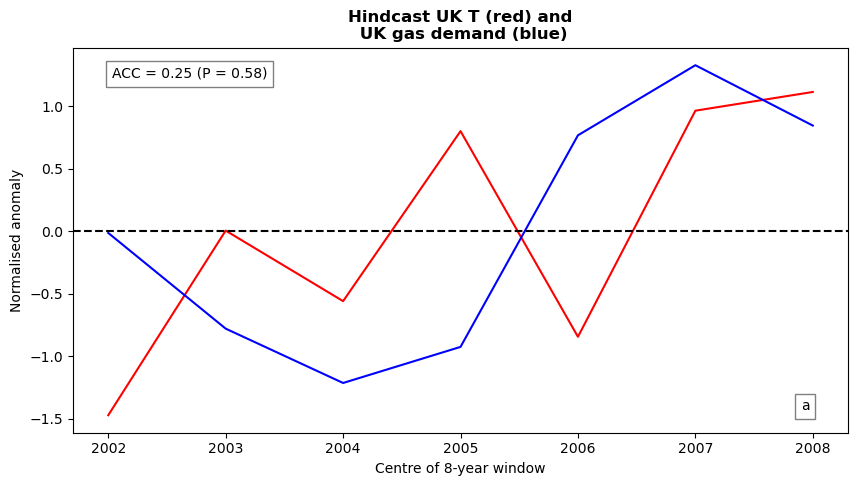

In [22]:
# Test the plotting function
funcs.plot_time_series(
    df=filtered_df,
    predictor_col="fcst_ts_mean",
    predictand_col="gas_demand_5yrRmean",
    ylabel="Normalised anomaly",
    figsize_x=10,
    figsize_y=5,
    twin_axes=False,
    do_detrend_predictor=False,
    do_detrend_predictand=False,
    normalise_anom=True,
    title="Hindcast UK T (red) and\n UK gas demand (blue)",
    label="a",
    fontsize=10,
    predictor_color="r",
    predictand_color="b",
    inverse_predictand=False,
)

In [ ]:
from scipy.stats import pearsonr

# Create a plot with two y-axes
# Time on the x-axes
# The variable on the left y-axes is the NAO anomaly (Pa)
# The variable on the right y-axes is the wind power (GW) for N_Europe
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot the NAO anomaly
ax1.plot(filtered_df.index, filtered_df.model_nao_mean / 100, "b-")

# Set the x-axis label
ax1.set_xlabel("Time")

# Set the y-axis label
ax1.set_ylabel("Hindcast NAO anomaly (hPa)", color="b")

# Include a black dashed line for y=0
ax1.axhline(0, color="black", linestyle="--")

# Set the color of the ticks
ax1.tick_params("y", colors="b")

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the wind power
ax2.plot(merged_df_full.index, merged_df_full.ES, "r-")

# Set the y-axis label
ax2.set_ylabel("Spain solar CFs", color="r")

# Set the colour of the ticks
ax2.tick_params("y", colors="r")

# # Invert the y-axis
# ax2.invert_yaxis()

# Calculate the correlation between the NAO anomaly and the wind power
corr, p = pearsonr(merged_df_full.model_nao_mean, merged_df_full.ES)

# Include the correlation and p-value on the plot
ax2.text(
    0.05,
    0.95,
    f"Correlation: {corr:.2f}\nP-value: {p:.2f}",
    horizontalalignment="left",
    verticalalignment="top",
    bbox=dict(facecolor="white", alpha=0.5),
    transform=ax2.transAxes,
)

# Show the plot
plt.show()

In [ ]:
merged_df_full.head()

In [23]:
filtered_df.head()

,fcst_ts_mean,obs_ts,UK,NAO anomaly (Pa),delta P anomaly (Pa),UK_temp_anomaly,elec_demand_5yrRmean,elec_demand_5yrRmean_nohols,gas_demand_5yrRmean,gas_demand_5yrRmean_nohols,gas_demand_raw,UK_demand (GW),UK_wd_demand (GW)
2002,-1.472560,0.390530,6.375623,-10.014772,15.042356,6.375623,933.637503,939.362847,-0.014965,329.632357,327.528023,40.417521,41.881760
2003,0.003727,0.532760,6.525323,-42.999186,11.681405,6.525323,932.613306,937.907192,-0.780170,327.831176,329.410464,40.446237,41.910922
2004,-0.560271,0.561056,6.526178,-79.160849,-23.038371,6.526178,935.437179,940.103847,-1.214736,326.973379,329.265618,40.396007,41.857481
2005,0.799220,0.573132,6.540458,35.900106,48.716790,6.540458,932.138246,937.012966,-0.926170,327.905310,329.241565,40.444727,41.903281
2006,-0.845288,0.393952,6.315462,-165.808889,-106.855651,6.315462,931.653495,935.929009,0.765940,331.547577,331.562827,40.438226,41.899493


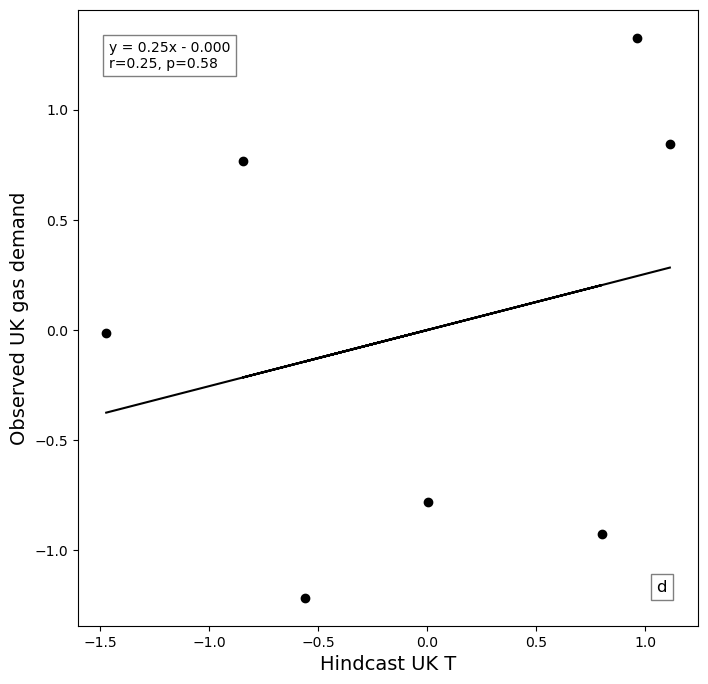

In [24]:
from scipy.stats import linregress

# Plot a scatter plot of NAO agaist wind power
plt.figure(figsize=(8, 8))

# Plot the scatter plot
plt.scatter(filtered_df.fcst_ts_mean, filtered_df["gas_demand_5yrRmean"], color="k")

# Include a line of best fit
slope, intercept, r_value, p_value, std_err = linregress(
    filtered_df.fcst_ts_mean, filtered_df["gas_demand_5yrRmean"]
)

# Plot the line of best fit
plt.plot(
    filtered_df.fcst_ts_mean,
    slope * filtered_df.fcst_ts_mean+ intercept,
    color="k",
)

# Show the values
if intercept < 0:
    equation = f"y = {slope:.2f}x - {abs(intercept):.3f}"
else:
    equation = f"y = {slope:.2f}x + {intercept:.3f}"

plt.text(
    0.05,
    0.95,
    f"{equation}\nr={r_value:.2f}, p={p_value:.2f}",
    horizontalalignment="left",
    verticalalignment="top",
    transform=plt.gca().transAxes,
    bbox=dict(facecolor="white", alpha=0.5),
)

# Set the x-axis label
plt.xlabel("Hindcast UK T", color="k", fontsize=14)

# Set the xticks to blue
plt.tick_params(axis="x", colors="k")

# Set the y-axis label
plt.ylabel("Observed UK gas demand", color="k", fontsize=14)

# Include a textbox in the bottom right
plt.text(
    0.95,
    0.05,
    f"d",
    fontsize=12,
    transform=plt.gca().transAxes,
    verticalalignment="bottom",
    horizontalalignment="right",
    bbox=dict(facecolor="white", alpha=0.5),
)

# Set the yticks to red
plt.tick_params(axis="y", colors="k")

# save this as a pdf
filename = "scatter_hc_T_uk_gas_demand_thornton.pdf"
dir = "/gws/nopw/j04/canari/users/benhutch/plots/"

# Save the figure
plt.savefig(f"{dir}{filename}",dpi=600)

In [ ]:
# Set up a dataframe to store the values
df = pd.DataFrame(
    {
        "slope": [slope],
        "intercept": [intercept],
        "r_value": [r_value],
        "p_value": [p_value],
        "std_err": [std_err],
    }
)

# Set up a filename for the dataframe
dir = "/home/users/benhutch/energy-met-corr/coeffs"

# If the directory does not exist, create it
if not os.path.exists(dir):
    os.makedirs(dir)

# Set up the filename
fname = "obs_nao_obs_solar_cfs_slope.csv"

# set up the full path
fpath = os.path.join(dir, fname)

# Save the datafram
df.to_csv(fpath)

In [ ]:
# Load in the ERA5 data for the NAO index
# Use this file
# adaptor.mars.internal-1691509121.3261805-29348-4-3a487c76-fc7b-421f-b5be-7436e2eb78d7.nc
# in ~/ERA5/
# Load the dataset
era5_data_path = "~/ERA5/adaptor.mars.internal-1691509121.3261805-29348-4-3a487c76-fc7b-421f-b5be-7436e2eb78d7.nc"

# Load the data into chunks
ds_era5 = xr.open_mfdataset(
    era5_data_path,
    combine="by_coords",
    parallel=True,
    chunks={"time": 100, "latitude": 100, "longitude": 100},
)[
    "msl"
]  # for mean sea level pressure

# Combine the first two expver variables
obs_msl = ds_era5.sel(expver=1).combine_first(ds_era5.sel(expver=5))

In [ ]:
# Constrain obs to ONDJFM
obs_msl = obs_msl.sel(time=obs_msl.time.dt.month.isin([10, 11, 12, 1, 2, 3]))

# Shift the time index back by 3 months
obs_msl_shifted = obs_msl.shift(time=-3)

# Take annual means
obs_msl_annual = obs_msl_shifted.resample(time="Y").mean()

# Throw away years 1959, 2021, 2022 and 2023
obs_msl_annual = obs_msl_annual.sel(time=slice("1960", "2019"))

# Remove the climatology
obs_msl_anomaly = obs_msl_annual - obs_msl_annual.mean(dim="time")

In [ ]:
# Extract the lats and lons of the azores
lat1, lat2 = dicts.era5_azores["lat1"], dicts.era5_azores["lat2"]
lon1, lon2 = dicts.era5_azores["lon1"], dicts.era5_azores["lon2"]

# Calculate the mean for the azores gridbox
obs_msl_anomaly_azores = obs_msl_anomaly.sel(
    latitude=slice(lat1, lat2), longitude=slice(lon1, lon2)
).mean(dim=["latitude", "longitude"])

In [ ]:
# Same for iceland
lat1, lat2 = dicts.era5_iceland["lat1"], dicts.era5_iceland["lat2"]
lon1, lon2 = dicts.era5_iceland["lon1"], dicts.era5_iceland["lon2"]

# Calculate the mean for the iceland gridbox
obs_msl_anomaly_iceland = obs_msl_anomaly.sel(
    latitude=slice(lat1, lat2), longitude=slice(lon1, lon2)
).mean(dim=["latitude", "longitude"])

In [ ]:
# Calculate the NAO index (azores - iceland)
nao_index = obs_msl_anomaly_azores - obs_msl_anomaly_iceland

In [ ]:
# EXtract the time series
nao_index_time = nao_index.time.values

# Extract the values
nao_index_values = nao_index.values

# Create a dataframe
nao_df = pd.DataFrame({"time": nao_index_time, "value": nao_index_values})

# Take a centred 8-year running mean
nao_running = nao_df.set_index("time").rolling(8, center=True).mean()

In [ ]:
# Have a look at the dataframe
nao_running.head()

In [ ]:
# Drop the NaN values
nao_running = nao_running.dropna()

In [ ]:
# Combine the two dataframes into one, using the index of the first
eez_df = eez_cfs.join(nao_running, how="inner")

In [ ]:
eez_df.head()

In [ ]:
# Rename the value column as 'NAO anomaly (Pa)'
eez_df = eez_df.rename(columns={"value": "NAO anomaly (Pa)"})

In [ ]:
# Drop the rows which contain NaN values in the NAO anomaly column
eez_df = eez_df.dropna()

In [ ]:
eez_df.head()

In [ ]:
from scipy.stats import pearsonr
import pandas as pd

# Create a new dataframe with columns for:
# 'region' - e.g. Netherlands_7
# 'correlation' - the correlation between the NAO and the offshore wind CFs
# 'p-value' - the p-value of the correlation
# Set up the dataframe
correlation_df = pd.DataFrame(columns=["region", "correlation", "p-value"])

# Loop over the regions
for region in eez_df.columns[:-1]:
    # Calculate the correlation
    corr, p = pearsonr(eez_df[region], eez_df["NAO anomaly (Pa)"])

    # Create a new DataFrame to append
    df_to_append = pd.DataFrame(
        {"region": [region], "correlation": [corr], "p-value": [p]}
    )

    # Append to the dataframe
    correlation_df = pd.concat([correlation_df, df_to_append], ignore_index=True)

In [ ]:
correlation_df.head()

In [ ]:
# Remove the numbers from the region column by removing the last 2 characters
correlation_df["region"] = correlation_df["region"].str

In [ ]:
correlation_df

In [ ]:
# if any of the region names contain the string "_" then remove it
correlation_df["region"] = correlation_df["region"].str.replace("_", " ")

In [ ]:
correlation_df.head()

In [ ]:
EEZ_shapefile["SOVEREIGN1"]

In [ ]:
# Create two new columns in the geopandas dataframe 'EEZ_shapefile'
# 'correlation' - the correlation between the NAO and the offshore wind CFs
# 'p-value' - the p-value of the correlation
EEZ_shapefile["correlation"] = np.nan
EEZ_shapefile["p-value"] = np.nan

In [ ]:
EEZ_shapefile.head()

In [ ]:
# Loop over the regions in correlation_df
for region in correlation_df["region"]:
    # Extract the row from correlation_df
    row = correlation_df[correlation_df["region"] == region]

    # Extract the correlation and p-value
    corr = row["correlation"].values[0]
    p = row["p-value"].values[0]

    # Set the values in the EEZ_shapefile
    EEZ_shapefile.loc[EEZ_shapefile["TERRITORY1"] == region, "correlation"] = corr
    EEZ_shapefile.loc[EEZ_shapefile["TERRITORY1"] == region, "p-value"] = p

In [ ]:
EEZ_shapefile["TERRITORY1"] == "France", "correlation"

In [ ]:
# Extract the list of Terrirories
territories = EEZ_shapefile["TERRITORY1"]

# Convert to a list
territories = list(territories)

# Print the territories
print(territories)

In [ ]:
# Constrain EEZ shapefile to only include the territories in the list
EEZ_shapefile = EEZ_shapefile[EEZ_shapefile["TERRITORY1"].isin(dicts.countries_list)]

In [ ]:
# Print the correlation values for FRance
print(EEZ_shapefile[EEZ_shapefile["SOVEREIGN1"] == "France"]["correlation"])

In [ ]:
# Import cartopy
import cartopy.crs as ccrs

# Now plot the EEZ_shapefile with the correlation as the color
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
EEZ_shapefile.plot(
    column="correlation", ax=ax, legend=True, cmap="coolwarm", shrink=0.5
)
# Use cartopy to add the coastlines
ax.coastlines()
# Make the colorbar smaller
cbar = ax.get_figure().get_axes()[1]
cbar.set_ylabel("Correlation", fontsize=12)
cbar.tick_params(labelsize=10)

# Constrain to specific bounds
ax.set_xlim(-50, 50)
ax.set_ylim(30, 80)

In [ ]:
# Now plot the EEZ_shapefile with the correlation as the color
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": ccrs.PlateCarree()})
cax = EEZ_shapefile.plot(
    column="correlation", ax=ax, cmap="coolwarm", add_colorbar=False
)

# Use cartopy to add the coastlines
ax.coastlines()

# Add colorbar
cbar = fig.colorbar(cax.collections[0], ax=ax, shrink=0.5)
cbar.set_label("Correlation")

# Constrain to specific bounds
ax.set_xlim(-50, 50)
ax.set_ylim(30, 80)